In [1]:
import pandas

sw = pandas.read_csv('data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_local/tmscore.csv')
sw['Aligner'] = 'Local'
isw_p5 = pandas.read_csv('data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_i_local_p5/tmscore.csv')
isw_p5['Aligner'] = 'iLocal\n(extend 5)'
isw_p20 = pandas.read_csv('data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_i_local_p20/tmscore.csv')
isw_p20['Aligner'] = 'iLocal\n(extend 20)'
isw_p5p5p20 = pandas.read_csv('data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_i_local_p5p5p20/tmscore.csv')
isw_p5p5p20['Aligner'] = 'iLocal\n(5->5->20)'
swisw_p5p5p20 = pandas.read_csv('data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_local_i_local_p5p5p20/tmscore.csv')
swisw_p5p5p20['Aligner'] = 'Local+iLocal\n(5->5->20)'
iblast = pandas.read_csv('data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_i_blast/tmscore.csv')
iblast['Aligner'] = 'iBLAST'
tmscore_df = pandas.concat([swisw_p5p5p20, sw, isw_p5, isw_p20, isw_p5p5p20, iblast])
tmscore_df

,Unnamed: 0,Aligner,Rank,TM-score,PDB
0,0,Local+iLocal\n(5->5->20),1,0.64087,d2oi8a1_1.pdb
1,1,Local+iLocal\n(5->5->20),1,0.78611,d5fb8c__1.pdb
2,2,Local+iLocal\n(5->5->20),1,0.78924,d3cu5a1_1.pdb
3,3,Local+iLocal\n(5->5->20),1,0.74840,d3mdqa2_1.pdb
4,4,Local+iLocal\n(5->5->20),1,0.94969,d2bz6l__1.pdb
...,...,...,...,...,...
8147,8147,iBLAST,100,0.12849,d1jl5a__100.pdb
8148,8148,iBLAST,100,0.16665,d1q0qa3_100.pdb
8149,8149,iBLAST,100,0.23561,d1pvza__100.pdb
8150,8150,iBLAST,100,0.25397,d3q9va__100.pdb


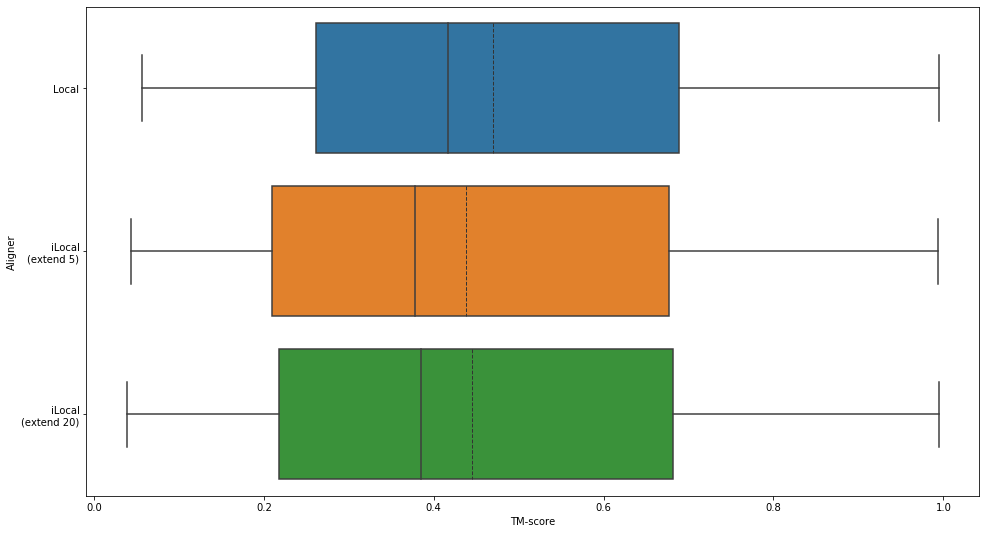

In [2]:
%matplotlib inline
import seaborn
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(16, 9))
seaborn.boxplot(x='TM-score', y='Aligner',
                data=tmscore_df[(tmscore_df['Aligner'] == 'iLocal\n(extend 5)') | (tmscore_df['Aligner'] == 'Local') | (tmscore_df['Aligner'] == 'iLocal\n(extend 20)')],
                showmeans=True, meanline=True, meanprops={'color': '#333333'}, ax=ax)
fig.savefig('img/all_tm_1.pdf', bbox_inches='tight', pad_inches=0)

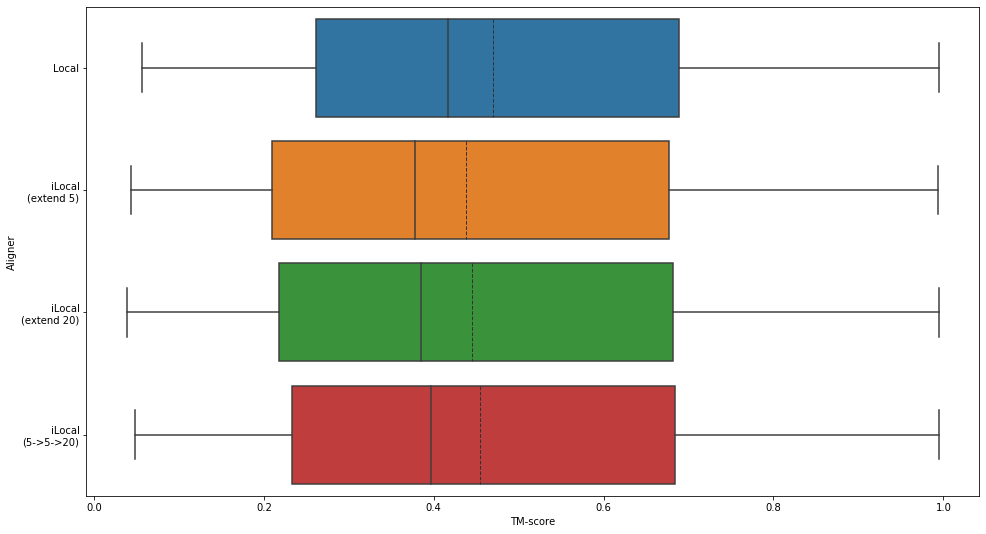

In [3]:
%matplotlib inline
import seaborn
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(16, 9))
seaborn.boxplot(x='TM-score', y='Aligner',
                data=tmscore_df[(tmscore_df['Aligner'] == 'iLocal\n(extend 5)') | (tmscore_df['Aligner'] == 'Local') | (tmscore_df['Aligner'] == 'iLocal\n(extend 20)') | (tmscore_df['Aligner'] == 'iLocal\n(5->5->20)')],
                showmeans=True, meanline=True, meanprops={'color': '#333333'}, ax=ax)
fig.savefig('img/all_tm_2.pdf', bbox_inches='tight', pad_inches=0)

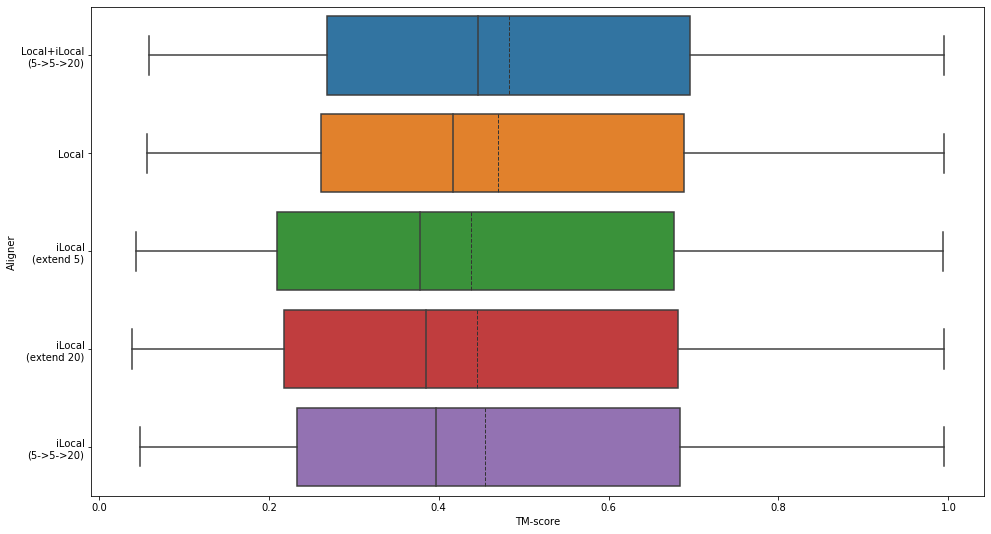

In [4]:
%matplotlib inline
import seaborn
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(16, 9))
seaborn.boxplot(x='TM-score', y='Aligner', data=tmscore_df, showmeans=True, meanline=True, meanprops={'color': '#333333'}, ax=ax)
fig.savefig('img/all_tm_3.pdf', bbox_inches='tight', pad_inches=0)

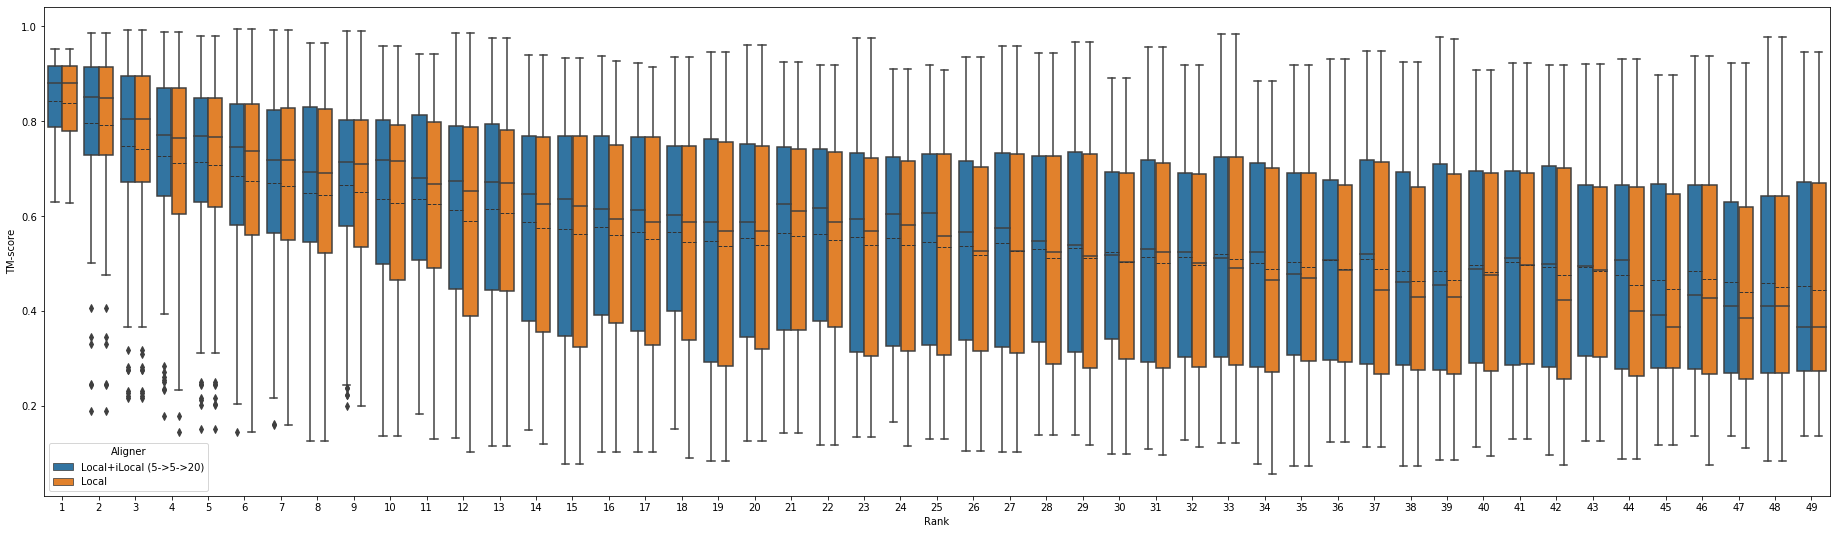

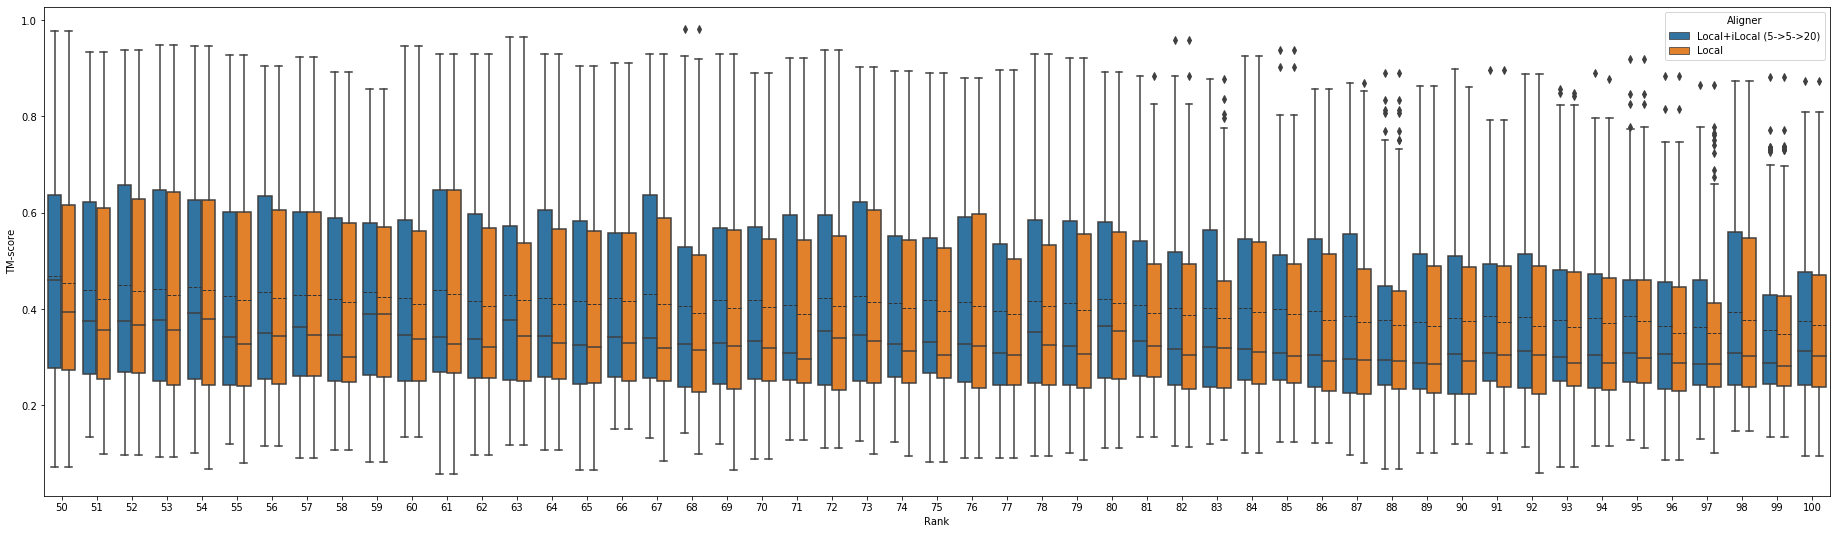

In [17]:
tmscore_df_sub = tmscore_df[(tmscore_df['Aligner'] == 'Local') | (tmscore_df['Aligner'] == 'Local+iLocal (5->5->20)')]
fig, ax = pyplot.subplots(figsize=(32, 9))
seaborn.boxplot(x='Rank', y='TM-score', hue='Aligner',
                data=tmscore_df_sub[tmscore_df_sub['Rank'] < 50],
                showmeans=True, meanline=True, ax=ax, meanprops={'color': '#333333'})
fig.savefig('img/all_tm_rank_1.pdf', bbox_inches='tight', pad_inches=0)
fig, ax = pyplot.subplots(figsize=(32, 9))
seaborn.boxplot(x='Rank', y='TM-score', hue='Aligner',
                data=tmscore_df_sub[(tmscore_df_sub['Rank'] >= 50) & (tmscore_df_sub['Rank'] <= 100)],
                showmeans=True, meanline=True, ax=ax, meanprops={'color': '#333333'})
fig.savefig('img/all_tm_rank_2.pdf', bbox_inches='tight', pad_inches=0)

In [3]:
from pathlib import Path
from Bio import SeqIO
from tqdm.auto import tqdm

diff_df = pandas.merge(tmscore_df[tmscore_df['Aligner'] == 'iBLAST'],
                       tmscore_df[tmscore_df['Aligner'] == 'Local+iLocal\n(5->5->20)'], on='PDB')
diff_df['diff'] = diff_df['TM-score_y'] - diff_df['TM-score_x']
diff_df['Query'] = diff_df['PDB'].apply(lambda _: _[:7])

scop100_idx = SeqIO.index('data/scop/astral-scopedom-seqres-gd-all-2.07-stable.fa', 'fasta')
correct = []
for _, row in tqdm(diff_df.iterrows(), total=diff_df.shape[0]):
    pdb = Path()/'data'/'evaluation'/'delta_u50_50_u50_50_s95_500_evalue_sum_i_blast'/row.PDB
    template = [_ for _ in pdb.read_text().splitlines() if _.startswith('REMARK') and 'TEMPLATE:' in _][0].split()[3]
    if scop100_idx[template].description.split()[1].split('.')[:3] == scop100_idx[row.Query].description.split()[1].split('.')[:3]:
        correct.append(True)
    else:
        correct.append(False)
diff_df['Correct'] = correct
diff_df

,Unnamed: 0_x,Aligner_x,Rank_x,TM-score_x,PDB,Unnamed: 0_y,Aligner_y,Rank_y,TM-score_y,diff,Query,Correct
0,0,iBLAST,1,0.64737,d2oi8a1_1.pdb,0,Local+iLocal\n(5->5->20),1,0.64087,-0.00650,d2oi8a1,True
1,1,iBLAST,1,0.77518,d3cu5a1_1.pdb,2,Local+iLocal\n(5->5->20),1,0.78924,0.01406,d3cu5a1,True
2,2,iBLAST,1,0.72484,d3mdqa2_1.pdb,3,Local+iLocal\n(5->5->20),1,0.74840,0.02356,d3mdqa2,True
3,3,iBLAST,1,0.78443,d5fb8c__1.pdb,1,Local+iLocal\n(5->5->20),1,0.78611,0.00168,d5fb8c_,True
4,4,iBLAST,1,0.88938,d2bbaa1_1.pdb,13,Local+iLocal\n(5->5->20),1,0.88740,-0.00198,d2bbaa1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8004,8147,iBLAST,100,0.12849,d1jl5a__100.pdb,9418,Local+iLocal\n(5->5->20),100,0.25655,0.12806,d1jl5a_,False
8005,8148,iBLAST,100,0.16665,d1q0qa3_100.pdb,9413,Local+iLocal\n(5->5->20),100,0.33371,0.16706,d1q0qa3,False
8006,8149,iBLAST,100,0.23561,d1pvza__100.pdb,9411,Local+iLocal\n(5->5->20),100,0.24995,0.01434,d1pvza_,False
8007,8150,iBLAST,100,0.25397,d3q9va__100.pdb,9416,Local+iLocal\n(5->5->20),100,0.32646,0.07249,d3q9va_,False


In [4]:
correct_df = diff_df[diff_df['Correct']]
correct_df = pandas.concat([
    pandas.DataFrame({
        'Aligner': correct_df['Aligner_y'],
        'Rank': correct_df['Rank_y'],
        'TM-score': correct_df['TM-score_y']
    }),
    pandas.DataFrame({
        'Aligner': correct_df['Aligner_x'],
        'Rank': correct_df['Rank_x'],
        'TM-score': correct_df['TM-score_x']
    })
])
correct_df

,Aligner,Rank,TM-score
0,Local+iLocal\n(5->5->20),1,0.64087
1,Local+iLocal\n(5->5->20),1,0.78924
2,Local+iLocal\n(5->5->20),1,0.74840
3,Local+iLocal\n(5->5->20),1,0.78611
4,Local+iLocal\n(5->5->20),1,0.88740
...,...,...,...
7980,iBLAST,100,0.21993
7983,iBLAST,100,0.61240
7987,iBLAST,100,0.27708
7991,iBLAST,100,0.22274


In [5]:
fig, ax = pyplot.subplots(figsize=(16, 9))
seaborn.boxplot(x='TM-score', y='Aligner', data=correct_df, showmeans=True, meanline=True, meanprops={'color': '#333333'}, ax=ax)
#fig.savefig('img/correct_tm.pdf', bbox_inches='tight', pad_inches=0)

NameError: name 'pyplot' is not defined

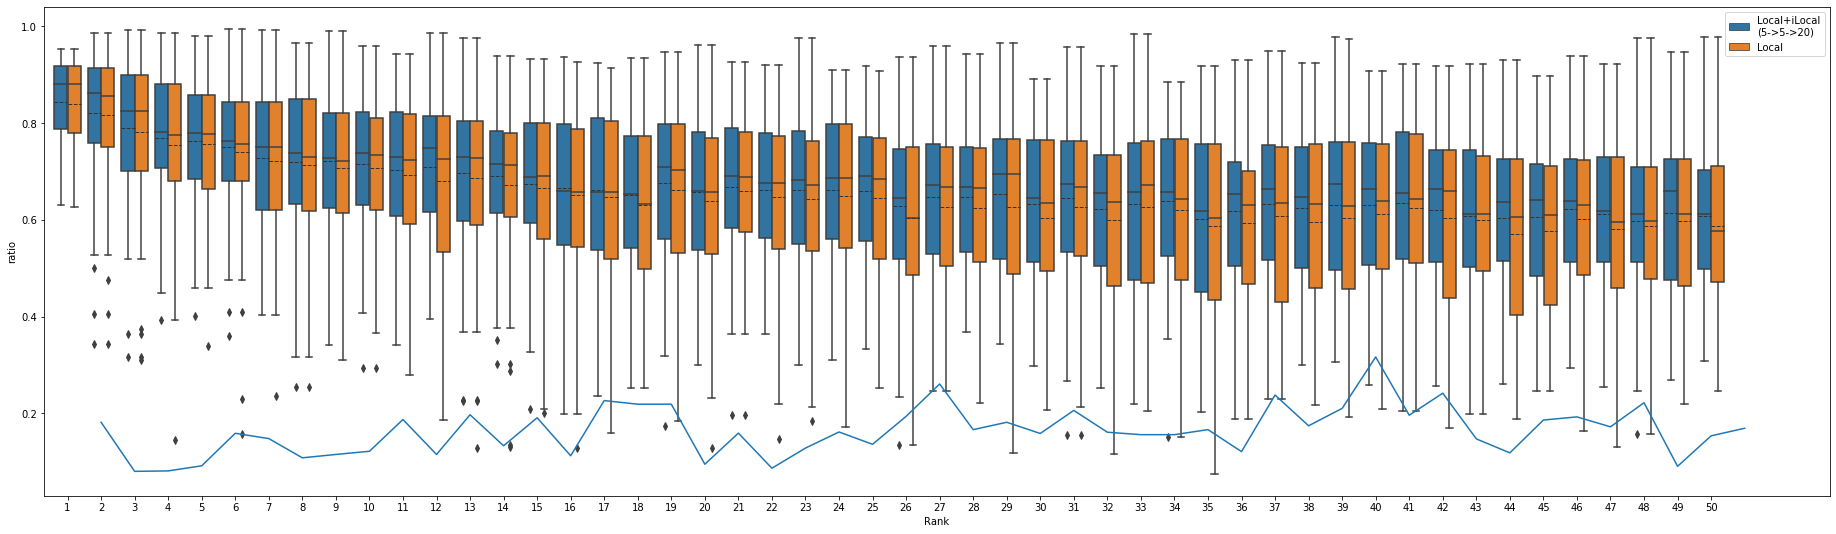

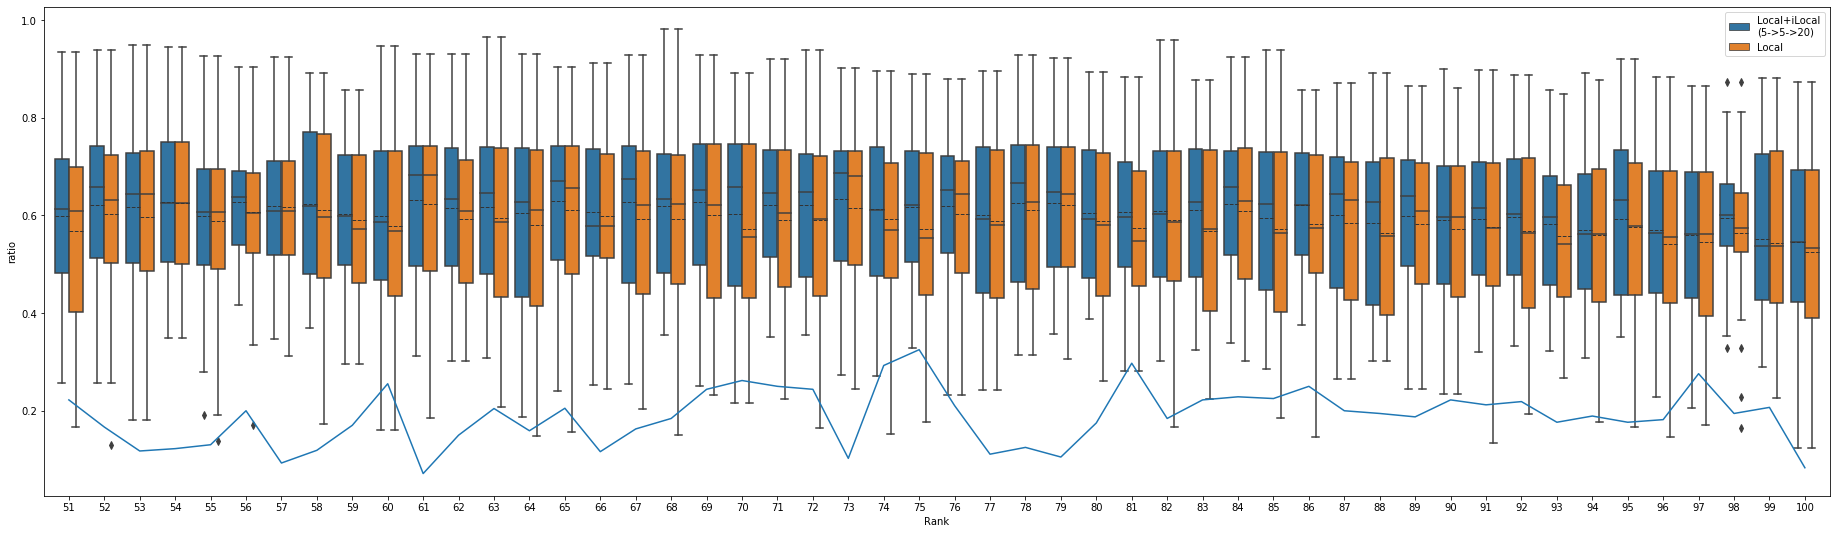

In [8]:
import numpy as np

ilocal_ratio_df = {'Rank': [], 'local': [], 'ilocal': []}
for rank in range(100):
    local_n, ilocal_n = 0, 0
    for query in diff_df[(diff_df['Rank_x'] == rank+1) & (diff_df['Rank_y'] == rank+1) & diff_df['Correct']]['Query']:
        r = np.load(f'data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_local_i_local_p5p5p20/{query}.npy', allow_pickle=True)
        if r[rank][7][1] == 'local':
            local_n += 1
        elif r[rank][7][1] == 'ilocal':
            ilocal_n += 1
        else:
            raise ValueError
    ilocal_ratio_df['Rank'].append(rank+1)
    ilocal_ratio_df['local'].append(local_n)
    ilocal_ratio_df['ilocal'].append(ilocal_n)

ilocal_ratio_df = pandas.DataFrame.from_dict(ilocal_ratio_df)
ilocal_ratio_df['sum'] = ilocal_ratio_df['local'] + ilocal_ratio_df['ilocal']
ilocal_ratio_df['ratio'] = ilocal_ratio_df['ilocal'] / ilocal_ratio_df['sum']

fig, ax = pyplot.subplots(figsize=(32, 9))
seaborn.boxplot(x='Rank', y='TM-score', hue='Aligner', data=correct_df[correct_df['Rank'] <= 50],
                showmeans=True, meanline=True, ax=ax, meanprops={'color': '#333333'})
seaborn.lineplot(x='Rank', y='ratio', data=ilocal_ratio_df[ilocal_ratio_df['Rank'] <= 50], ax=ax)
fig.savefig('img/correct_tm_rank_1.pdf', bbox_inches='tight', pad_inches=0)
fig, ax = pyplot.subplots(figsize=(32, 9))
seaborn.boxplot(x='Rank', y='TM-score', hue='Aligner', data=correct_df[correct_df['Rank'] > 50],
                showmeans=True, meanline=True, ax=ax, meanprops={'color': '#333333'})
seaborn.lineplot(x=range(0, 50), y=ilocal_ratio_df[ilocal_ratio_df['Rank'] > 50]['ratio'], ax=ax)
fig.savefig('img/correct_tm_rank_2.pdf', bbox_inches='tight', pad_inches=0)

# diff

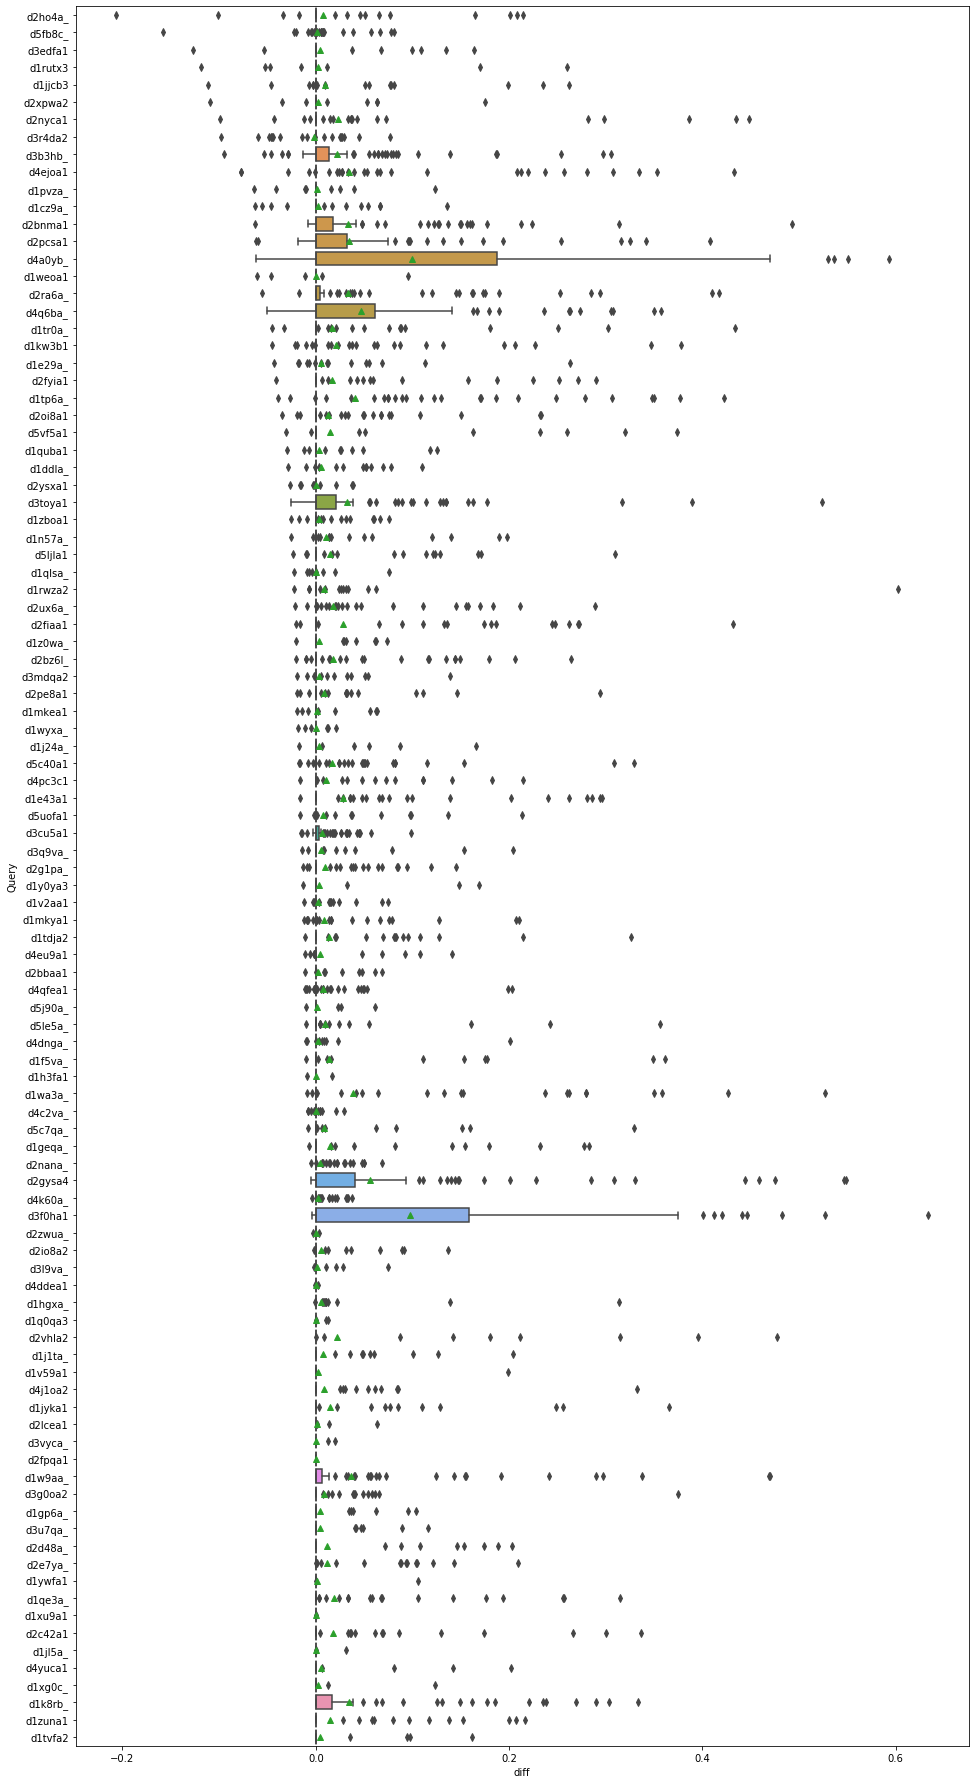

In [21]:
fig, ax = pyplot.subplots(figsize=(16, 32))
seaborn.set_style('ticks')
seaborn.boxplot(x='diff', y='Query', data=diff_df, ax=ax, showmeans=True)

In [6]:
pandas.set_option('display.max_rows', 100)
bads = diff_df[(diff_df['diff'] < -0.05) & diff_df['Correct']]
bads

,Unnamed: 0_x,Aligner_x,Rank_x,TM-score_x,PDB,Unnamed: 0_y,Aligner_y,Rank_y,TM-score_y,diff,Query,Correct
44,44,iBLAST,2,0.57224,d1rutx3_2.pdb,30,Local+iLocal\n(5->5->20),2,0.34388,-0.22836,d1rutx3,True
136,136,iBLAST,3,0.80866,d1jyka1_3.pdb,172,Local+iLocal\n(5->5->20),3,0.72274,-0.08592,d1jyka1,True
172,172,iBLAST,4,0.59186,d1j1ta__4.pdb,224,Local+iLocal\n(5->5->20),4,0.47874,-0.11312,d1j1ta_,True
224,224,iBLAST,4,0.85165,d5ljla1_4.pdb,306,Local+iLocal\n(5->5->20),4,0.76080,-0.09085,d5ljla1,True
258,258,iBLAST,5,0.51273,d1tp6a__5.pdb,309,Local+iLocal\n(5->5->20),5,0.46119,-0.05154,d1tp6a_,True
...,...,...,...,...,...,...,...,...,...,...,...,...
7863,8002,iBLAST,99,0.43891,d2fiaa1_99.pdb,9244,Local+iLocal\n(5->5->20),99,0.28981,-0.14910,d2fiaa1,True
7934,8075,iBLAST,100,0.31580,d1qe3a__100.pdb,9420,Local+iLocal\n(5->5->20),100,0.12310,-0.19270,d1qe3a_,True
7941,8082,iBLAST,100,0.36415,d2ho4a__100.pdb,9341,Local+iLocal\n(5->5->20),100,0.30326,-0.06089,d2ho4a_,True
7953,8094,iBLAST,100,0.49329,d1qlsa__100.pdb,9350,Local+iLocal\n(5->5->20),100,0.37883,-0.11446,d1qlsa_,True


In [11]:
from io import StringIO
from pathlib import Path
import numpy as np
from Bio import AlignIO
from Bio.Align import MultipleSeqAlignment
from Bio.Alphabet import generic_protein

for i in bads.itertuples():
    results = np.load(Path(f'data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_local_i_local_p5p5p20/{i.Query}.npy'), allow_pickle=True)
    result = results[i.Rank_x-1]
    aln = AlignIO.read(StringIO(result[1][0]), format='clustal')
    print(aln.format('clustal'))
    aln = AlignIO.read(StringIO(result[3][0]), format='clustal')
    print(aln.format('clustal'))
    aln = AlignIO.read(StringIO(result[5][0]), format='clustal')
    print(aln.format('clustal'))
    print('#########')

CLUSTAL X (1.81) multiple sequence alignment


d4q6ba_                             --------EEIFIGVAWPFASLDDLFAEGLELAVQEINEQGGVQGRKLSL
UniRef50_A0A1V9I5H0                 SEKDGTIKVGLVAPLSGAMAQDGKSILNAAQLAVDEVNKEGGINKKKIEL

d4q6ba_                             VKADDEAELEKGLAIAQAFADNAGIQAVIGHRNSFISIPAASIYDQAGLV
UniRef50_A0A1V9I5H0                 VYEDDKGEPKEAASIANKYSSNKDIMAVIGSFSAACTLAGIPIYTKAKIP

d4q6ba_                             MLSPASTSPDLTDHGYIHVFRNI-PSDQEIARQLAIY-LAEQGHERMVIY
UniRef50_A0A1V9I5H0                 MMGPCGSAPALSDSS--EYYRKVTPSDLTTGKELSKWMLKDLNYKKVAII

d4q6ba_                             YTDDSYGNGLANAFEDYARAQGITIVDRFNYYGNLKDLERLYDKWQAFGM
UniRef50_A0A1V9I5H0                 YVNNDYGKGVAESVDNFYKENGGQVVAKESYMPKTQDFGSIITKVKSKNP

d4q6ba_                             DGIFIAKTATGGGTEFLVDAKSVGIEVPLIAGNSWDALSLTEDIENIGMT
UniRef50_A0A1V9I5H0                 D-IVIMGSFYGDAGAFLKQAHNVGYN-PKVAGPT--PLLSKSLVDLAGKD

d4q6ba_                             AEGLLVGSFFNPQRPDSRTQDFVEAFRREYGQPPTSYAAAGY

In [9]:
pandas.set_option('display.max_rows', 100)
goods = diff_df[diff_df['diff'] > 0]
goods

,Unnamed: 0_x,Aligner_x,Rank_x,TM-score_x,PDB,Unnamed: 0_y,Aligner_y,Rank_y,TM-score_y,diff,Query,Correct
1,1,iBLAST,1,0.77518,d3cu5a1_1.pdb,2,Local+iLocal\n(5->5->20),1,0.78924,0.01406,d3cu5a1,True
2,2,iBLAST,1,0.72484,d3mdqa2_1.pdb,3,Local+iLocal\n(5->5->20),1,0.74840,0.02356,d3mdqa2,True
3,3,iBLAST,1,0.78443,d5fb8c__1.pdb,1,Local+iLocal\n(5->5->20),1,0.78611,0.00168,d5fb8c_,True
5,5,iBLAST,1,0.90555,d4k60a__1.pdb,5,Local+iLocal\n(5->5->20),1,0.91002,0.00447,d4k60a_,True
6,6,iBLAST,1,0.95169,d1cz9a__1.pdb,6,Local+iLocal\n(5->5->20),1,0.95199,0.00030,d1cz9a_,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8004,8147,iBLAST,100,0.12849,d1jl5a__100.pdb,9418,Local+iLocal\n(5->5->20),100,0.25655,0.12806,d1jl5a_,False
8005,8148,iBLAST,100,0.16665,d1q0qa3_100.pdb,9413,Local+iLocal\n(5->5->20),100,0.33371,0.16706,d1q0qa3,False
8006,8149,iBLAST,100,0.23561,d1pvza__100.pdb,9411,Local+iLocal\n(5->5->20),100,0.24995,0.01434,d1pvza_,False
8007,8150,iBLAST,100,0.25397,d3q9va__100.pdb,9416,Local+iLocal\n(5->5->20),100,0.32646,0.07249,d3q9va_,False


In [ ]:
from io import StringIO
from pathlib import Path
import numpy as np
from Bio import AlignIO
from Bio.Align import MultipleSeqAlignment

for i in goods.itertuples():
    results = np.load(Path(f'data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_local_i_local_p5p5p20/{i.Query}.npy'), allow_pickle=True)
    result = results[i.Rank_x-1]
    aln = AlignIO.read(StringIO(result[-2][0]), format='clustal')
    pairwise = MultipleSeqAlignment([aln[0], aln[-1]])
    print(pairwise.format('clustal'))
    results = np.load(Path(f'data/evaluation/delta_u50_50_u50_50_s95_500_evalue_sum_local/{i.Query}.npy'), allow_pickle=True)
    result = results[i.Rank_x-1]
    aln = AlignIO.read(StringIO(result[-2][0]), format='clustal')
    pairwise = MultipleSeqAlignment([aln[0], aln[-1]])
    print(pairwise.format('clustal'))


CLUSTAL X (1.81) multiple sequence alignment


d3cu5a1                             ---RILIVDDEKLTRDGLIANINWKALSFDQI-DQADDGINAIQIALKHP
d1mvoa_                             MNKKILVVDDEESIV-TLLQYNLERSGYDVITA---SDGEEALKKAETEK

d3cu5a1                             PNVLLTDVRMPRMDGIELVDNILKLYPD--CSVIFMSGYSDKEYLKAAIK
d1mvoa_                             PDLIVLDVMLPKLDGIEVCKQLR--QQKLMFPILMLTAKDEEFDKVLGLE

d3cu5a1                             FRAIRYVEKPIDPSEIMDALKQSIQTVLQHQAQQ-----
d1mvoa_                             LGADDYMTKPFSPREVNARVKAILRRS------------



CLUSTAL X (1.81) multiple sequence alignment


d3cu5a1                             ---RILIVDDEKLTRDGLIANINWKALSFDQIDQADDGINAIQIALKHPP
d1mvoa_                             MNKKILVVDDEESI--VTLLQYNLERSGYDVI-TASDGEEALKKAETEKP

d3cu5a1                             NVLLTDVRMPRMDGIELVDNILK---LYPDCSVIFMSGYSDKEYLKA-AI
d1mvoa_                             DLIVLDVMLPKLDGIEVCKQLRQQKLMFP----ILMLTAKDEEFDKVLGL

d3cu5a1                             KFRAIRYVEKPIDPS